# Data Preprocessing


## Importing Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import librosa, librosa.display
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from IPython.display import Image 
import plotly.graph_objects as go
import sys
import os

In [2]:
sns.set()
plt.style.use('ggplot')
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
sys.path.append(os.path.abspath(os.path.join('../scripts')))

### Importing python Scripts from scripts directory

In [3]:
from clean_audio import CleanAudio
from file_handler import FileHandler
from audio_vis import AudioVis

In [4]:
clean_audio = CleanAudio()
file_handler = FileHandler()
audio_vis = AudioVis()

## Load Data


In [5]:
PATH_TRAIN_WAV = "../data/AMHARIC/train/wav/"
PATH_TEST_WAV = "../data/AMHARIC/test/wav/"
PATH_TRAIN_TEXT = "../data/AMHARIC/train/text"
PATH_TEST_TEXT = "../data/AMHARIC/test/text"

In [6]:
train_labels = os.listdir(PATH_TRAIN_WAV)
test_labels = os.listdir(PATH_TEST_WAV)
train_labels = [i.strip('.wav') for i in train_labels]
test_labels = [i.strip('.wav') for i in test_labels]
print(f"Total training data: {len(train_labels)}")
print(f"Total test data: {len(test_labels)}")
train_labels[:3], test_labels[:3]

Total training data: 10875
Total test data: 359


(['tr_10435_tr23137', 'tr_7457_tr75058', 'tr_5517_tr56018'],
 ['20_d520038', '20_d520028', '20_d520029'])

## Create Metadata

In [7]:
text_data, label_data = file_handler.read_data(PATH_TRAIN_TEXT, PATH_TEST_TEXT, train_labels, test_labels)
print(f"Total training data: {len(text_data)}")
print(f"Total test data: {len(label_data)}")
# text_data[:2], label_data[:2]

Total training data: 11234
Total test data: 11234


In [8]:
data = pd.DataFrame({'key': label_data, 'text': text_data})
data[:5]

key                                                                       text
0  tr_10000_tr097082  የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ተቋማትን እንዲ መሰርቱ ትልማ አይ ፈቅድ ም
1  tr_10001_tr097083                                     የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ
2  tr_10002_tr097084                                           ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል
3  tr_10003_tr097085                                 እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ
4  tr_10004_tr097086                                    ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ

In [9]:
y = [x in test_labels for x in data.key]
data["category"] = ["Test" if i else "Train" for i in y]
data.sample(5)

key                                                                            text category
3096    tr_29_tr01029                     መላእክት ያጀቡ ት ህጻን ቦረና ህጻናት ን የሚጠብቁ ና የሚንከባከ ቧቸው መላእክት አሉ ይባላል    Train
9639   tr_888_tr09088  ፈረንሳይ ውስጥ የሚ ጫወተው የ ኮትዲቭዋር ኢብራሂም ባካዮኮ ያለው ፐርፎርማንስ ከ እ ለት ወደ እ ለት ልዩ እየ ሆነ ይገኛል    Train
8024  tr_7435_tr75036                                                       ዮርክ ኮል ና ጆር ዲ ክሩፍ አግብ ተዋል    Train
8761  tr_8099_tr81100                                        ያቺ ታ ዛዧ ና ለ ደከመ ው ሁሉ አጋ ዧ ልጀ ችሁ ደህ ና ና ት    Train
5249  tr_4938_tr50039                                         ስን ጀምር እንኳ ከ አዋሳ ጋር ሪስ ክ ወስደን አጫው ተናቸዋል    Train

In [10]:
data["char_length"] = [len(i) for i in data.text]
data.sample(5)

key                                       text category  char_length
8708  tr_8050_tr81051            የመጀመሪያ ውን ክፍል ባለፈው እትማችን ጀምረ ናል    Train           31
4981  tr_4697_tr47098            ተ መልሰው እዚያ ው ወደ አንድነት ነው የሚ ገቡት    Train           31
6343  tr_5922_tr60023  በውጭ አገር ያሉ ኢትዮጵያውያ ን እርዳታ እንዲሰጡ ጥሪው ቀጥ ሏል    Train           41
8671  tr_8017_tr81018    ኢዴህፓ ኢዲዩ እና ኢዴፓ ጥቃት እየ ተፈጸመባቸው መሆኑን ገለጡ    Train           39
6417   tr_598_tr06098                 ለዚህ ም ሶስት ምክንያቶች ን አቅርበ ዋል    Train           26

In [11]:
duration_of_recordings = []
for i in range(data.shape[0]):
    path = ""
    if data.category[i] == "Train":
        path = PATH_TRAIN_WAV + data.key[i] + ".wav"
    else:
        path = PATH_TEST_WAV + data.key[i] + ".wav"


    audio, fs = librosa.load(path, sr=None)
    duration_of_recordings.append(float(len(audio) / fs))

In [12]:
data["duration"] = duration_of_recordings
data[:5]

key                                                                       text category  char_length  duration
0  tr_10000_tr097082  የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ተቋማትን እንዲ መሰርቱ ትልማ አይ ፈቅድ ም    Train           73      9.09
1  tr_10001_tr097083                                     የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ    Train           38      5.63
2  tr_10002_tr097084                                           ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል    Train           32      6.14
3  tr_10003_tr097085                                 እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ    Train           42      5.76
4  tr_10004_tr097086                                    ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ    Train           39      5.38

## Data Exploration

In [13]:
data.describe()

char_length  duration
count     11234.00  11234.00
mean         55.26      6.65
std          28.69      3.06
min          10.00      1.79
25%          33.00      4.35
50%          47.00      5.82
75%          74.00      8.32
max         163.00     24.19

### Transcription

In [ ]:
words_in_data = pd.DataFrame(' '.join(data['text']).split())
words_in_data.columns = ['word']
words_data = words_in_data.groupby(['word']).agg({'word': 'count'})
words_data.columns = ['counts']
words_data.reset_index(inplace=True)
words_data = words_data.sort_values("counts", ascending=False)
words_data.head()

word  counts
11779    የ    7952
4889     በ    6570
7746     ን    6470
7704     ና    3238
2708     ም    2958

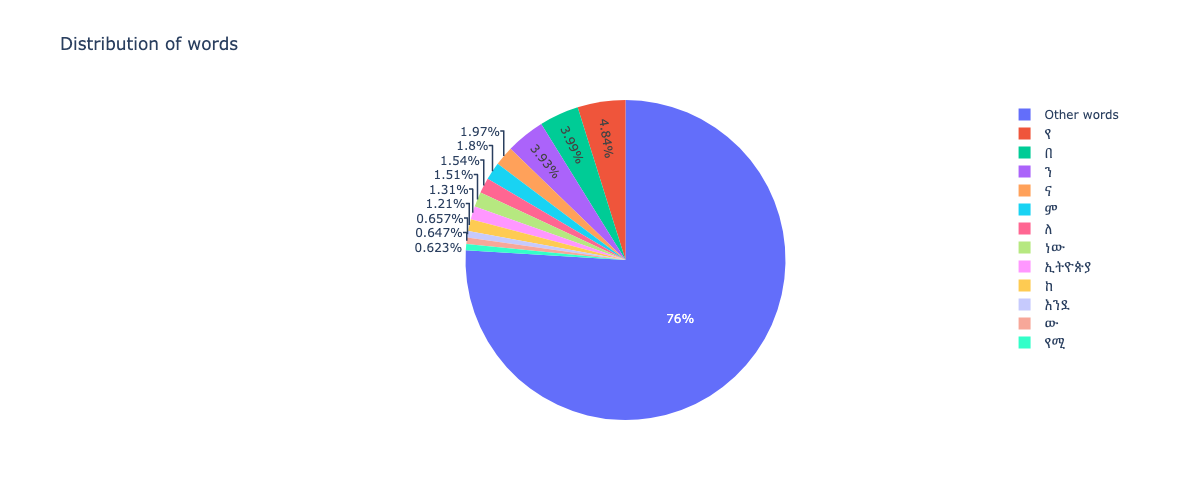

In [ ]:
words_data.loc[words_data['counts'] < 1000, 'word'] = 'Other words'
fig = px.pie(words_data, values='counts', names='word', title='Distribution of words', width=800, height=500)
Image(pio.to_image(fig, format='png', width=1200))

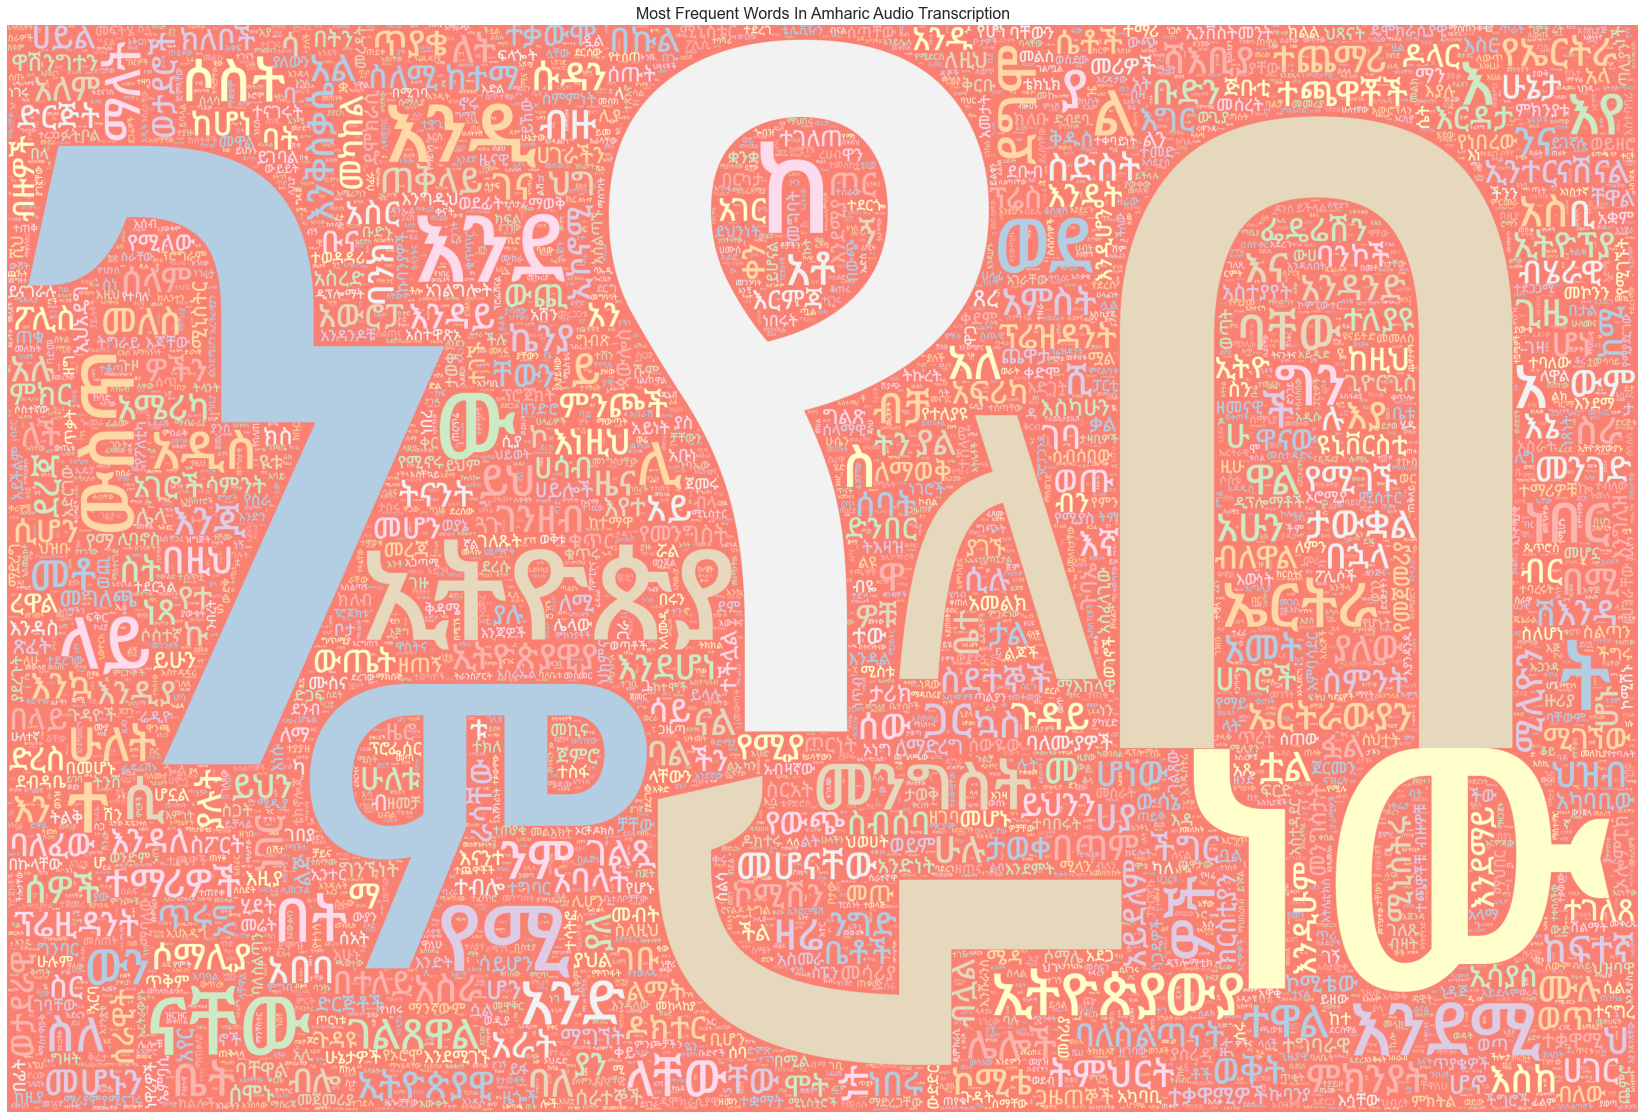

In [ ]:
audio_vis.get_wc(data, 'text', [])

### Audio


In [13]:
def get_paths(category, key):
  if(category == "Train"):
    return PATH_TRAIN_WAV + key + ".wav"
  else:
    return PATH_TEST_WAV + key + ".wav"

In [14]:
path_to_sample = get_paths(data.category[0], data.key[0])
sample_audio, sr = file_handler.read_audio_signal(path_to_sample)
print(sr)
print(sample_audio)

22000
[-0.11535194 -0.13088593 -0.11130099 ... -0.12260991 -0.14306018
 -0.09356608]


In [15]:
audio_vis.play_audio(sample_audio)

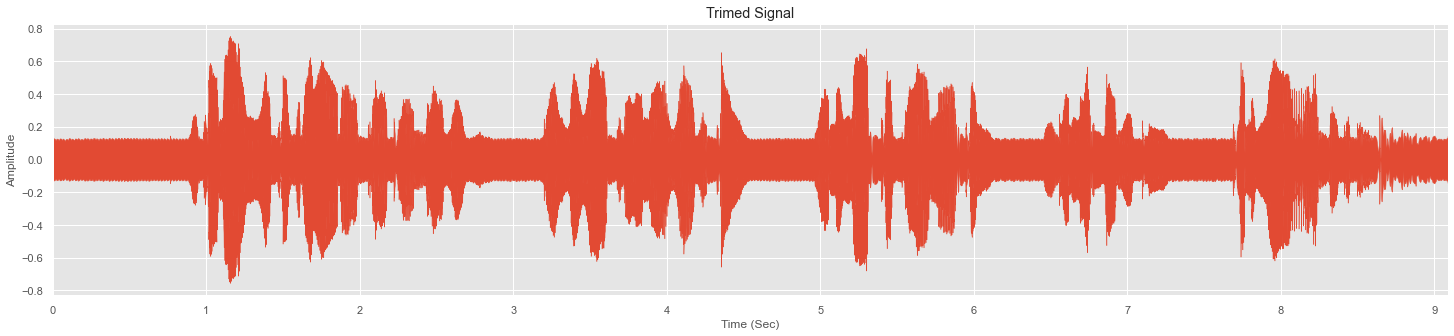

In [17]:
audio_vis.wav_plot(sample_audio, 'Trimed Signal', 'Amplitude', 'Time (Sec)')

FFT spectrum
Fourier transform also known as the fast fourier transform
Decomposes complex periodic sound like the one above into sum
of sine waves oscilating at
different frequencies
The FFT moves us from the time domain to the frequency domain
It should be noted that with FFT we loose information about time


<function matplotlib.pyplot.show(close=None, block=None)>

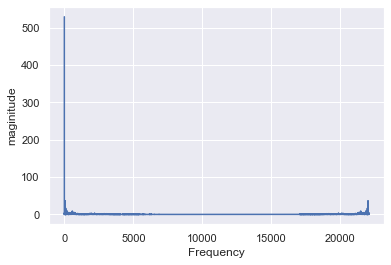

In [17]:
fft = np.fft.fft(signal)
maginitude =np.abs(fft)
frequency =np.linspace(0,sr, len(maginitude))
plt.plot(frequency,maginitude)
plt.xlabel("Frequency")
plt.ylabel("maginitude")
plt.show

In the power  spectrum , more energy is concetrated in the lower frequencies , the higher you go with the frequencies the 
less energy 

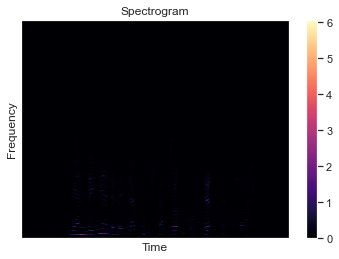

In [18]:
#Because of the FTT loos of time we need to find away of 
#seeing how things change with time 
#The Short term Fourier transform is the solution to 
#the FTT limitation

#The STFT
#it computes several FTT at different intervals and in doing so it preserves information about time 
#The different intervals at which we perform the FTT is given by the fixed frame size (eg, 2048 samples)
#This gives us a spectrogram which is a representation of magnitude as a function of frequency and time
#
#spectogram stft


n_fft =2048
hop_length =512

stft =librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

librosa.display.specshow(spectrogram,sr=sr, hop_length=hop_length)
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

Most of the frequencies have very low aplititude, so they contribute littel to the overall sound

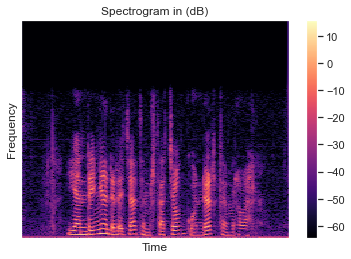

In [19]:
#log spectrogram 
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram,sr=sr, hop_length=hop_length)
plt.title("Spectrogram in (dB)")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

Most of the energy is concetrated on the lower frequencies 

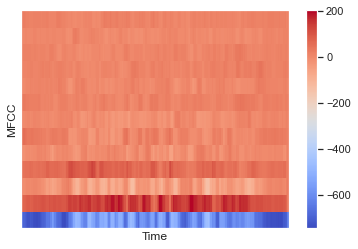

In [20]:
#MFCCs
#Mel frequency Cepstral Cooefficients (MFCCs)
#The MFCC are capble of capture the different quality of sound like capturing the timbraltextual 
#aspects of sound
#MFCC are also a frequency domain feature 
#The greatest advantage of MFCCs over a spectrogram is that they approximate the human 
#auditory system .. it is important for deep learning 
#Mostly 13 -40 coeficients are used in audio music which are caluculated at each frame 

#they are used ofr speech reconginitions , music genre classification and music instrument classification
MFCCs = librosa.feature.mfcc(signal, n_fft = n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCCs,sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

In [21]:
#Print the timeline of the audio 

y, sr = librosa.load(sampl_train_file.format(audio)) #you just need to make sure your audio is in the same folder in which you are coding or else you can change the path as per your requirement
time = np.arange(0,len(y))/sr
print(time) # prints timeline of arabic6

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.60789116e+00
 4.60793651e+00 4.60798186e+00]


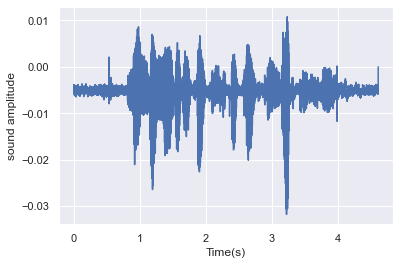

In [22]:
#Another way to plot time vs amplititude

y, sr = librosa.load(sampl_train_file.format(audio))
time = np.arange(0,len(y))/sr
fig, ax = plt.subplots()
ax.plot(time,y)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()

[112.34714674]


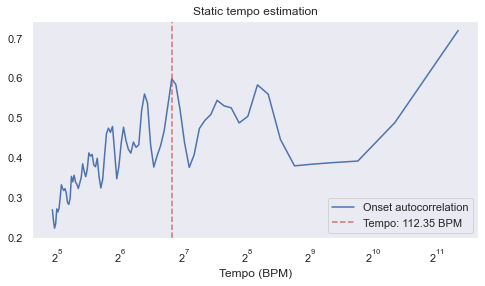

In [23]:
#ploting and finding the estimated tempo
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
print(tempo)
tempo = np.asscalar(tempo)
# Compute 2-second windowed autocorrelation
hop_length = 512
ac = librosa.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = librosa.tempo_frequencies(len(ac), sr=sr,hop_length=hop_length)
# Plot on a BPM axis.  We skip the first (0-lag) bin.
plt.figure(figsize=(8,4))
plt.semilogx(freqs[1:], librosa.util.normalize(ac)[1:],label='Onset autocorrelation', basex=2)
plt.axvline(tempo, 0, 1, color='r', alpha=0.75, linestyle='--',label='Tempo: {:.2f} BPM'.format(tempo))
plt.xlabel('Tempo (BPM)')
plt.grid()
plt.title('Static tempo estimation')
plt.legend(frameon=True)
plt.axis('tight')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
///
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


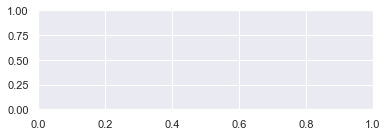

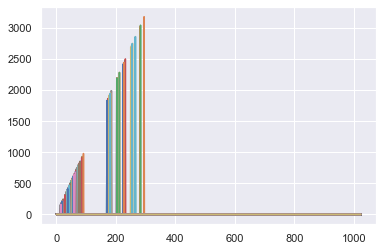

In [24]:
#finding and plotting the pitch 
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
print(pitches)
print('///')
print(magnitudes)
plt.subplot(212)
plt.show()
plt.plot(pitches)
plt.show()

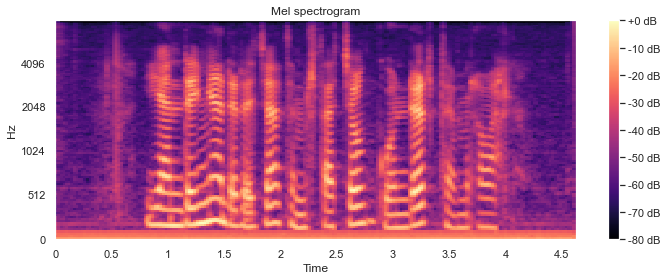

In [25]:
#cumpute a mel-scaled spectrogram
librosa.feature.melspectrogram(y=y, sr=sr)

D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

## Clean Audio

Preprocessing of speech signals is considered a crucial step in the development of a robust and efficient speech recognition system. Here we will try to remove the silence / unvoiced part of the speech. We start by taking three sample audio signals so we can observe the effect of cleaning on the audio.


In [18]:
signals = []
for i in range(3):
    path_to_sample = get_paths(data.category[i], data.key[i])
    sample_audio, sr = file_handler.read_audio_signal(path_to_sample)
    signals.append(sample_audio)

### mean normalization

In [19]:
normal_signal = []
for s in signals:
    normal_signal.append(clean_audio.normalize_audio(s))


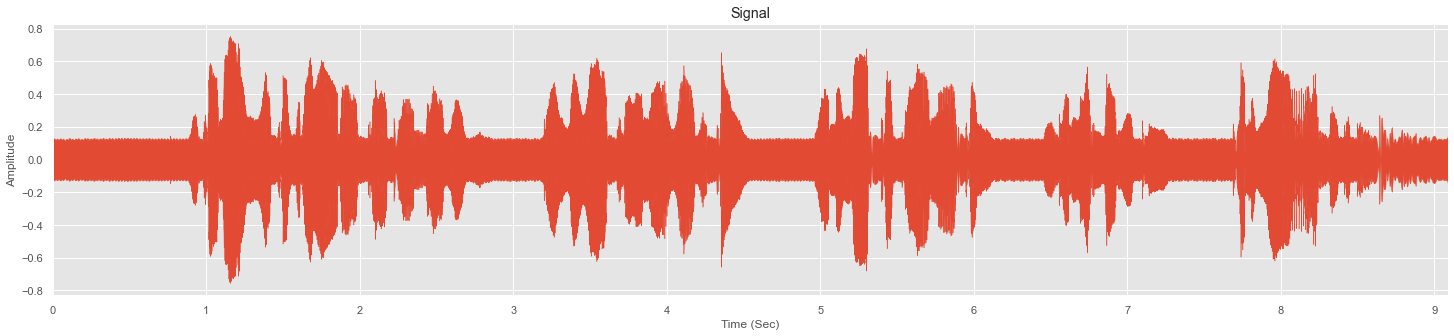

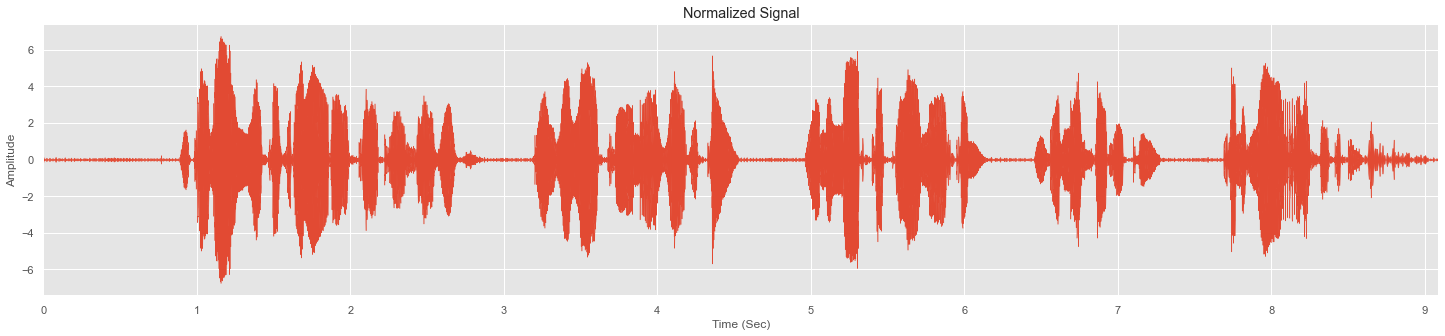


					---------------------------------------------



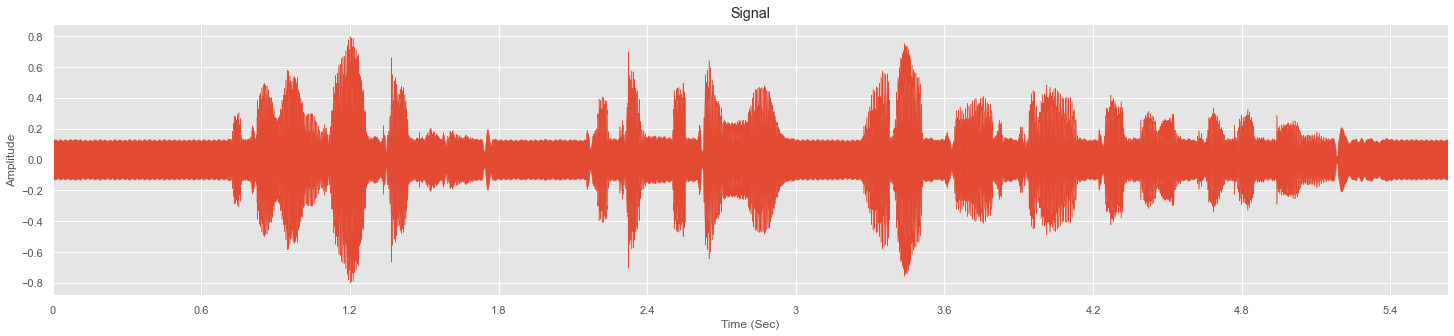

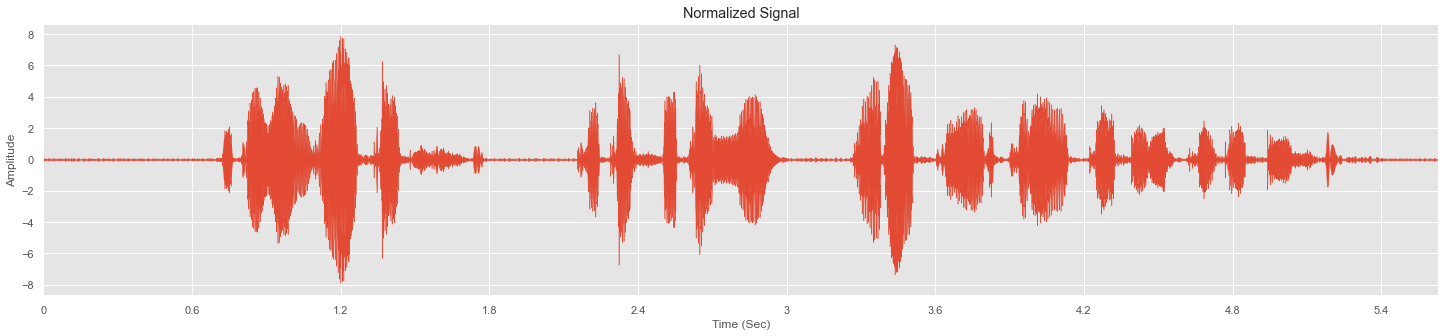


					---------------------------------------------



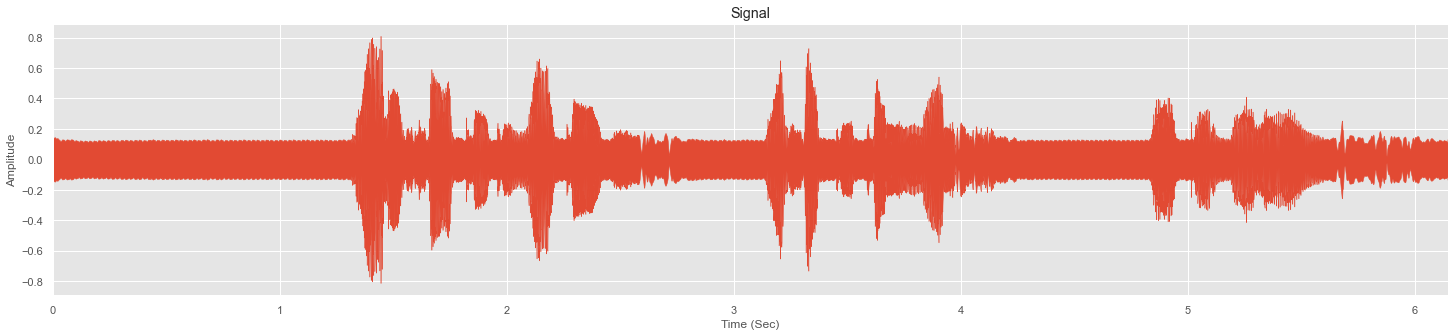

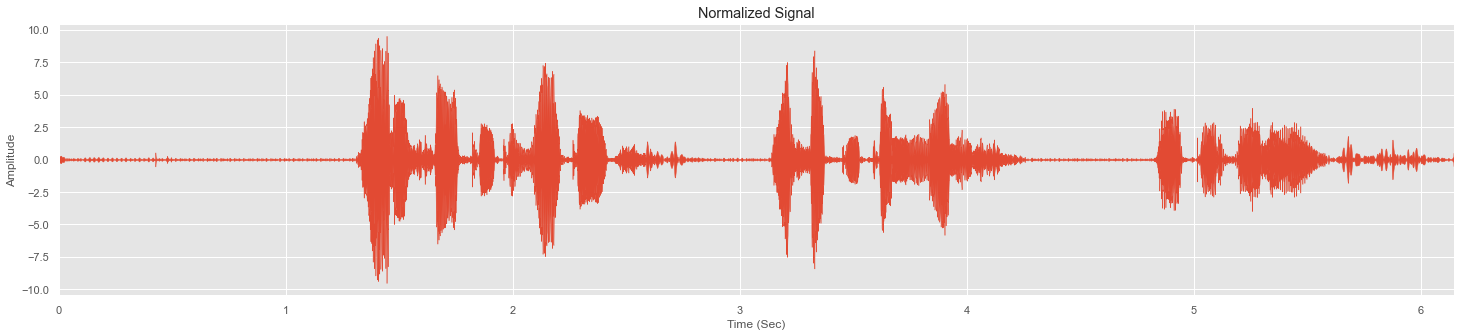


					---------------------------------------------



In [20]:
for s, n in zip(signals, normal_signal):
  audio_vis.wav_plot(s, 'Signal', 'Amplitude', 'Time (Sec)')
  audio_vis.wav_plot(n, 'Normalized Signal', 'Amplitude', 'Time (Sec)')
  print("\n\t\t\t\t\t---------------------------------------------\n")


In [21]:
audio_vis.play_audio(normal_signal[2])


### Trim
Trim leading and trailing silence from an audio signal. The split function required to mention the magnitude of low volumes in decibels and in reference to the max value present in the audio signal.

In [22]:
def calc_ref_dec(signal):
  y = librosa.amplitude_to_db(abs(sample_audio))
  refDBVal = np.max(y)
  n_fft = 2048
  S = librosa.stft(sample_audio, n_fft=n_fft, hop_length=n_fft // 2)
  D = librosa.amplitude_to_db(np.abs(S), ref=np.max)
  return np.max(abs(D))

In [23]:
calc_ref_dec(s)

80.0

As you observe, max value of audio is around 80 db and we need to have the ‘top_db’ value mentioned such that any value that are lesser than ’80 — top_db’ value would be considered as mute sections.

Default value of ‘top_db’ as per librosa documentation is ‘60’ and in most of the cases it gives a decent results. Here we will go with 30 db, meaning audios below 50 db will be cut off.


In [25]:
clean_signal = []
for s in normal_signal:
    clean_signal.append(clean_audio.trim_audio(s, 30))


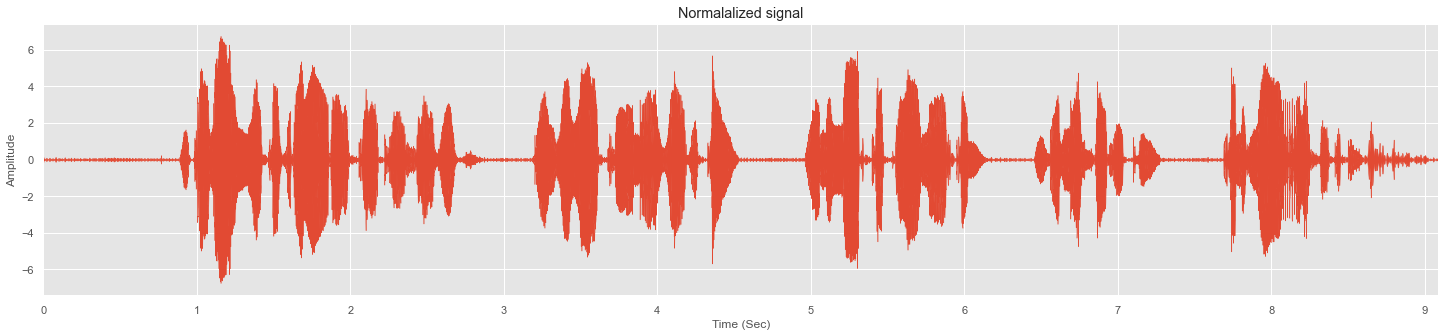

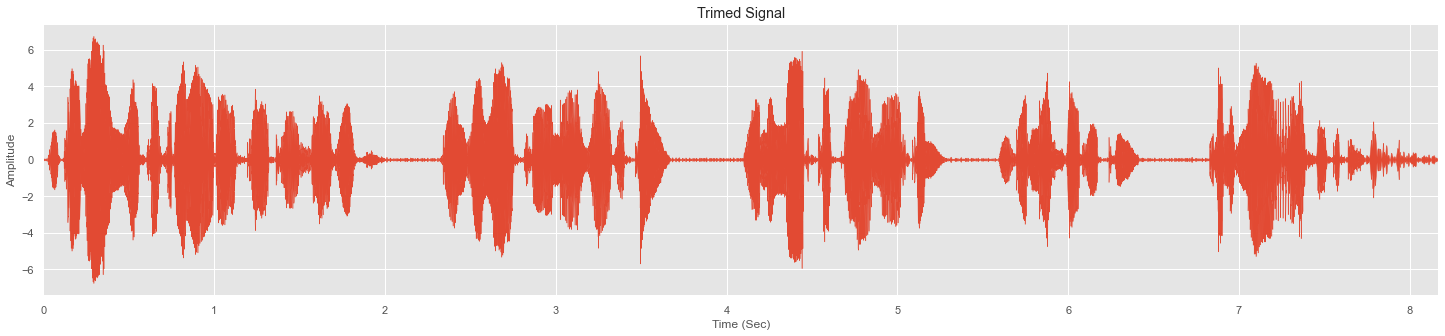


					---------------------------------------------



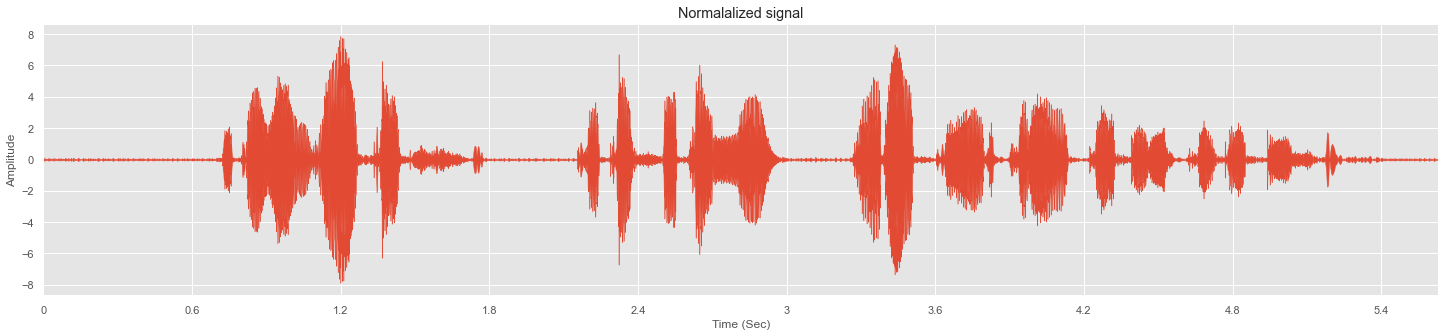

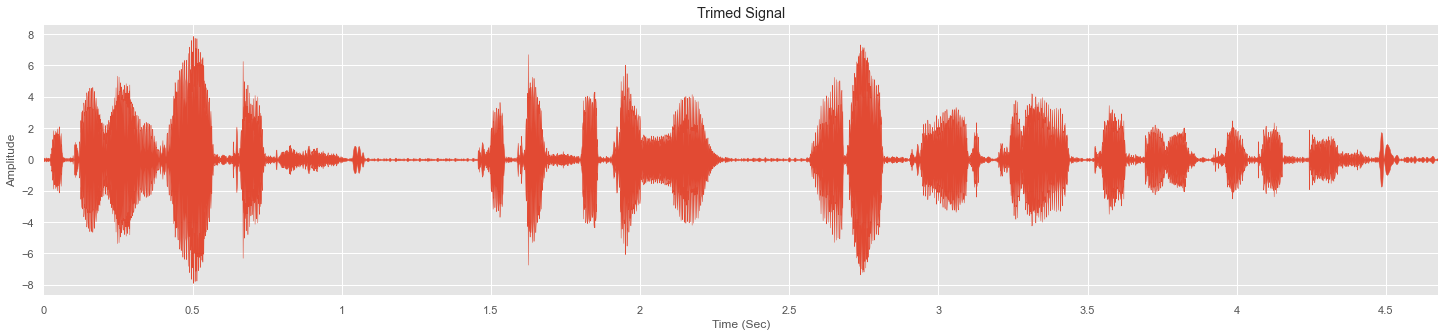


					---------------------------------------------



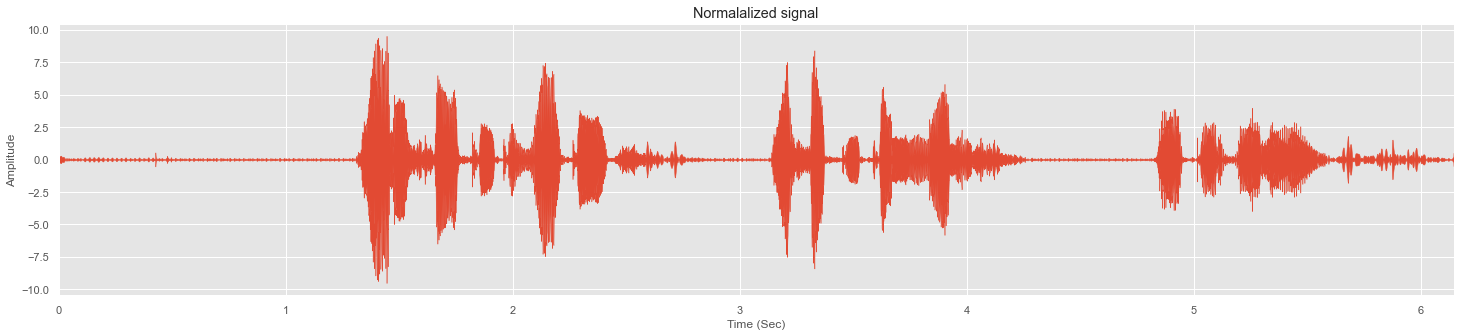

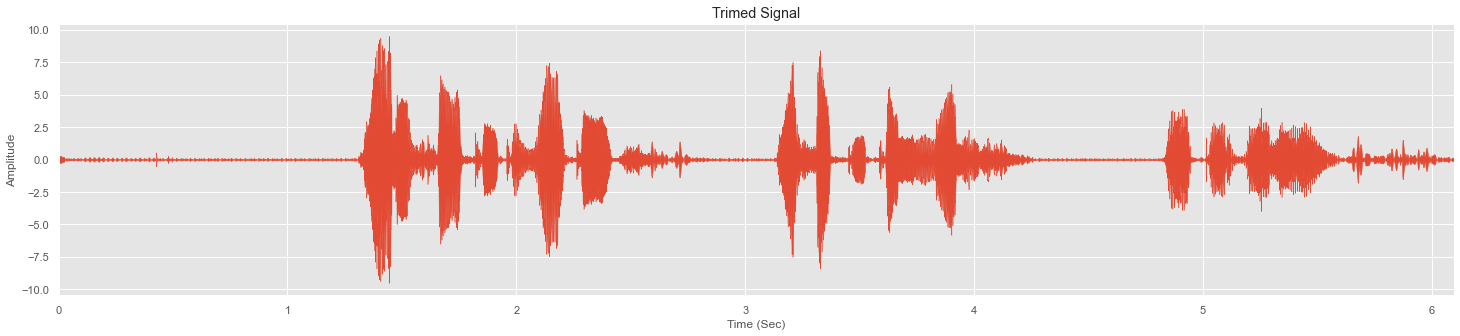


					---------------------------------------------



In [26]:
for n, c in zip(normal_signal, clean_signal):
    audio_vis.wav_plot(n, 'Normalalized signal', 'Amplitude', 'Time (Sec)')
    audio_vis.wav_plot(c, 'Trimed Signal', 'Amplitude', 'Time (Sec)')
    print("\n\t\t\t\t\t---------------------------------------------\n")


In [27]:
audio_vis.play_audio(normal_signal[1])

### Split
Split an audio signal into non-silent intervals.

In [28]:
clean_signal = []
for s in normal_signal:
    clean_signal.append(clean_audio.split_audio(s, 30))

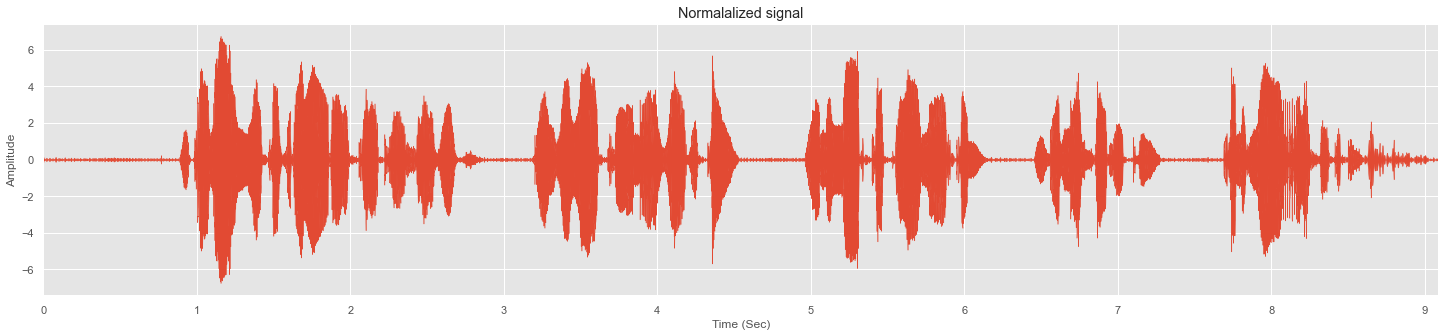

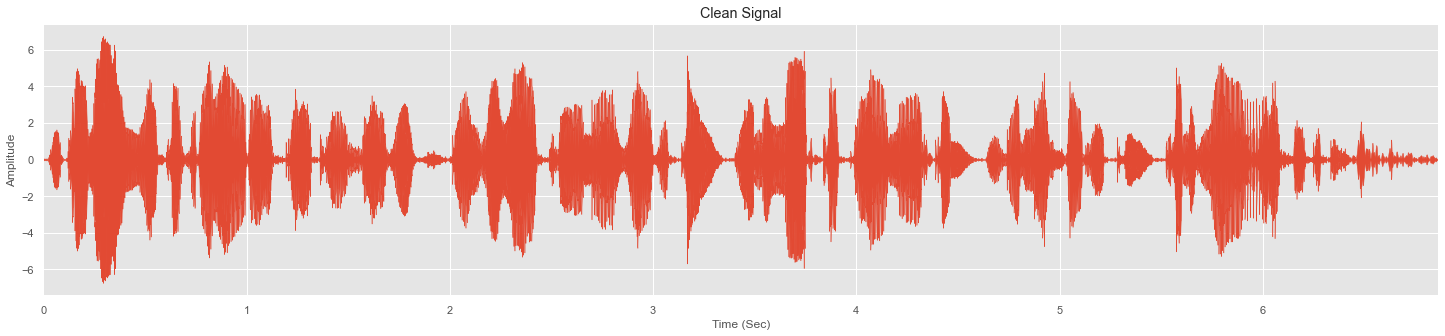


					---------------------------------------------



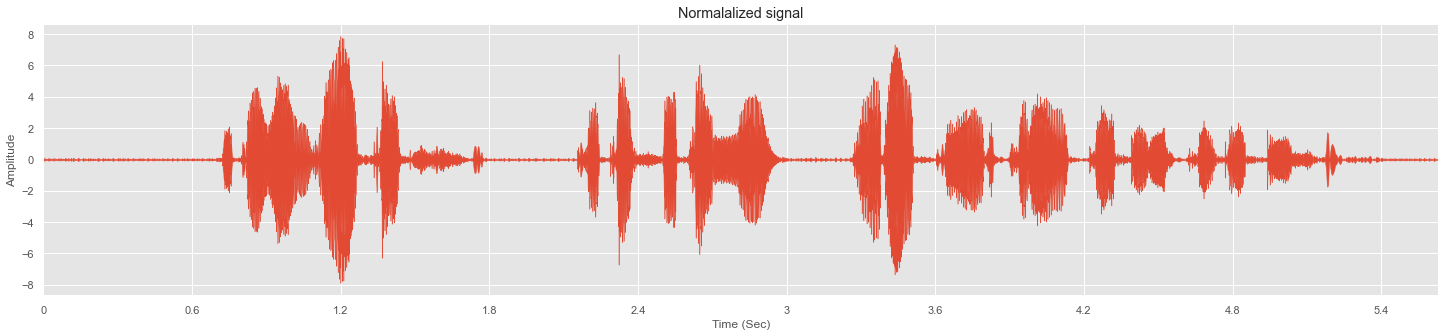

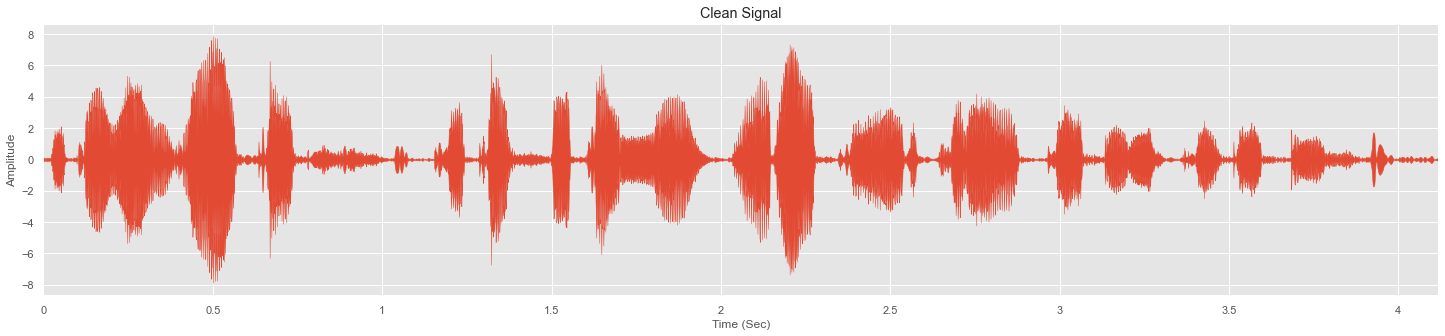


					---------------------------------------------



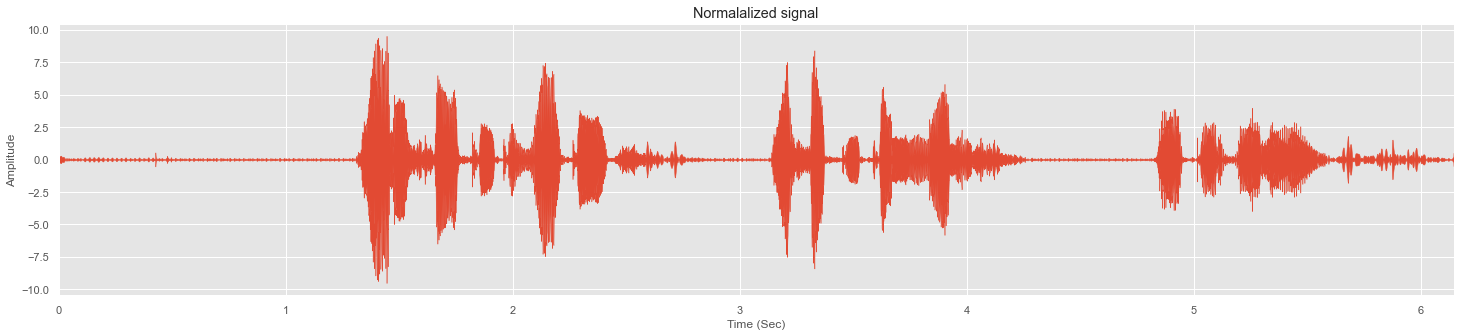

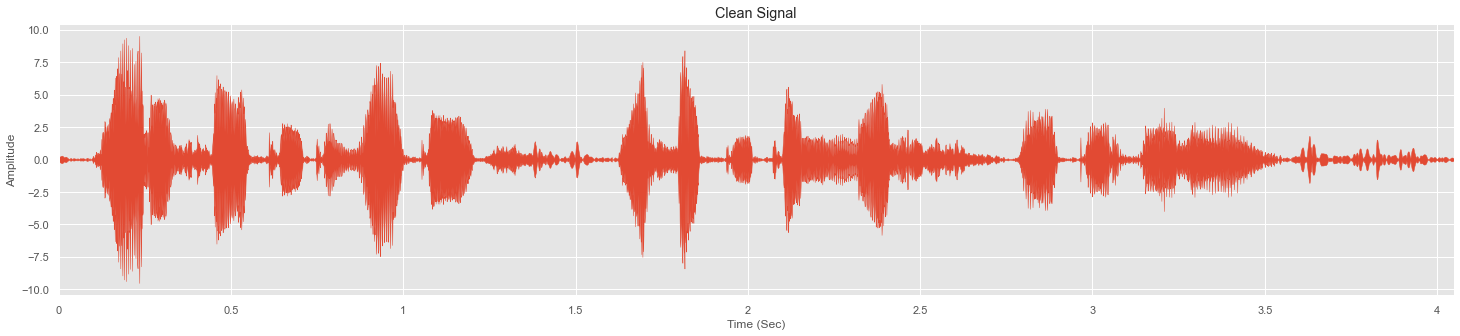


					---------------------------------------------



In [29]:
for n, c in zip(normal_signal, clean_signal):
    audio_vis.wav_plot(n, 'Normalalized signal', 'Amplitude', 'Time (Sec)')
    audio_vis.wav_plot(c, 'Clean Signal', 'Amplitude', 'Time (Sec)')
    print("\n\t\t\t\t\t---------------------------------------------\n")

In [30]:
audio_vis.play_audio(normal_signal[2])

## Clean Text

In [33]:
clean_word_dict = file_handler.read_text("../data/dictionary.txt")
clean_word_list = []
for i in clean_word_dict:
  clean_word_list.append(i.split(" ")[0])

clean_word_list[:10]

['ነው', 'ላይ', 'ውስጥ', 'እና', 'ወደ', 'ጋር', 'ነበር', 'ጊዜ', 'ግን', 'ነገር']

In [52]:
def get_clean_word(words, position):
  word = temp_word = words[position]
  position = position + 1
  move_with_error = 0
  # print("---------------------------------")
  while((position < len(words) - 1) and (move_with_error < 3)):  # Give it five tries
    # print(f"word :{word} | temp_word: {temp_word} | position {position} | move_with_error: {move_with_error}")
    new_word = temp_word + words[position]
    if(new_word in clean_word_list):
      temp_word = new_word
      word = temp_word
      position = position + 1
      move_with_error = 0
    else:
      temp_word = new_word
      move_with_error = move_with_error + 1
  return word, position


In [36]:
clean_text = []
for sent in data.text[1:3]:
  words = sent.split(" ")
  clean_sent = []
  position = 0
  while(position < len(words)-1):
    clean_word, position = get_clean_word(words, position)
    clean_sent.append(clean_word)
  clean_text.append(" ".join(clean_sent))
  print(f"\nsentance: {sent}")
  print(f"clean sentance: {(' '.join(clean_sent))}\n\n")

---------------------------------
word :የ | temp_word: የ | position 1 | move_with_error: 0
word :የጠመንጃ | temp_word: የጠመንጃ | position 2 | move_with_error: 0
word :የጠመንጃ | temp_word: የጠመንጃተኩስ | position 2 | move_with_error: 1
word :የጠመንጃ | temp_word: የጠመንጃተኩስተኩስ | position 2 | move_with_error: 2
word :የጠመንጃ | temp_word: የጠመንጃተኩስተኩስተኩስ | position 2 | move_with_error: 3
word :የጠመንጃ | temp_word: የጠመንጃተኩስተኩስተኩስተኩስ | position 2 | move_with_error: 4
---------------------------------
word :ተኩስ | temp_word: ተኩስ | position 3 | move_with_error: 0
word :ተኩስ | temp_word: ተኩስተከፈተ | position 3 | move_with_error: 1
word :ተኩስ | temp_word: ተኩስተከፈተተከፈተ | position 3 | move_with_error: 2
word :ተኩስ | temp_word: ተኩስተከፈተተከፈተተከፈተ | position 3 | move_with_error: 3
word :ተኩስ | temp_word: ተኩስተከፈተተከፈተተከፈተተከፈተ | position 3 | move_with_error: 4
---------------------------------
word :ተከፈተ | temp_word: ተከፈተ | position 4 | move_with_error: 0
word :ተከፈተና | temp_word: ተከፈተና | position 5 | move_with_error: 0
word :ተከፈተና |

In [53]:
clean_text = []
count = 0
for sent in data.text:
  words = sent.split(" ")
  clean_sent = []
  position = 0
  while(position < len(words)):
    clean_word, position = get_clean_word(words, position)
    clean_sent.append(clean_word)

  if((count % 1000) == 0):
      print(f"Done: {(count/data.shape[0]*100):.2f}%")
  count += 1

  clean_text.append(" ".join(clean_sent))

Done: 0.00%
Done: 8.90%
Done: 17.80%
Done: 26.70%
Done: 35.61%
Done: 44.51%
Done: 53.41%
Done: 62.31%
Done: 71.21%
Done: 80.11%
Done: 89.02%
Done: 97.92%


In [55]:
data["clean_text"] = clean_text
data[["clean_text", "text"]].tail(5)

clean_text                                                                                                   text
11229           በትግራይ ህዝብስ ም የተቋቋመው ኤፈርት አዲስ የቴሌቪዥን ጣቢያ ሊከፍት መሆኑን ለጋዜጣዋ ዜና ዴስክ በኢንተርኔት የደረሰው ዘገባ አ መለከተ       በ ትግራይ ህዝብ ስ ም የ ተቋቋመው ኤፈርት አዲስ የ ቴሌቪዥን ጣቢያ ሊ ከፍት መሆኑን ለ ጋዜጣዋ ዜና ዴስ ክ በ ኢንተርኔት የ ደረሰው ዘገባ አ መለከተ
11230  ከዚህም ሌላ የ ቴሌቪዥ ኗ ጋዜጠኛ እንግዳ ዘር ነጋ እግሯን ኦፕራ ሲ ዩን የሆነች ሲሆን አሁን ከ ኦፕራሲዮኑ በኋላ በደህና ሁኔታ ትገኛለች ሲል ጠቁ ሟል  ከዚህ ም ሌላ የ ቴሌቪዥ ኗ ጋዜጠኛ እንግዳ ዘር ነጋ እግሯ ን ኦፕራ ሲ ዩን የ ሆነች ሲሆን አሁን ከ ኦፕራ ሲዮኑ በኋላ በደህና ሁኔታ ትገኛ ለች ሲል ጠቁ ሟል
11231                              ዘ ታይም ዘጋቢ እንደዘገበው ትልቁ የምግብ ማመላለስ ተግባር ወደ ዲናን የተደረገው ከሀምሳ ቀናት በፊት ነበር                             ዘ ታይም ዘጋቢ እንደ ዘገበው ትልቁ የ ምግብ ማመላለስ ተግባር ወደ ዲ ና ን የ ተደረገው ከ ሀምሳ ቀናት በፊት ነበር
11232                                      ወደከተማ በሚመጡ እንግዶች ላይ ድንጋጤን ይፈጥራል በሚል ችግሩ ባለበት ታፍኖ እንዲያዝ ተደርጓል                                      ወደ ከተማ በሚ መጡ እንግዶች ላይ ድንጋጤ ን ይ ፈጥራል በሚል ችግሩ ባለ በት ታፍኖ እንዲያዝ ተደርጓል
11233                       ዛሬም ይህ ጽሁፍ እስከ ተጻፈበት ድረስ ከአንድ ሺ ዘጠኝ መቶ አርባ አመተምህረት ጀምሮ በዚሁ ከተማ በመኖር ላይ ይገኛሉ                      ዛሬ ም ይህ ጽሁፍ እስከ ተጻፈ በት ድረስ ከ አንድ ሺ ዘጠኝ መቶ አርባ አመተ ምህረት ጀምሮ በ ዚሁ ከተማ በ መኖር ላይ ይገኛሉ

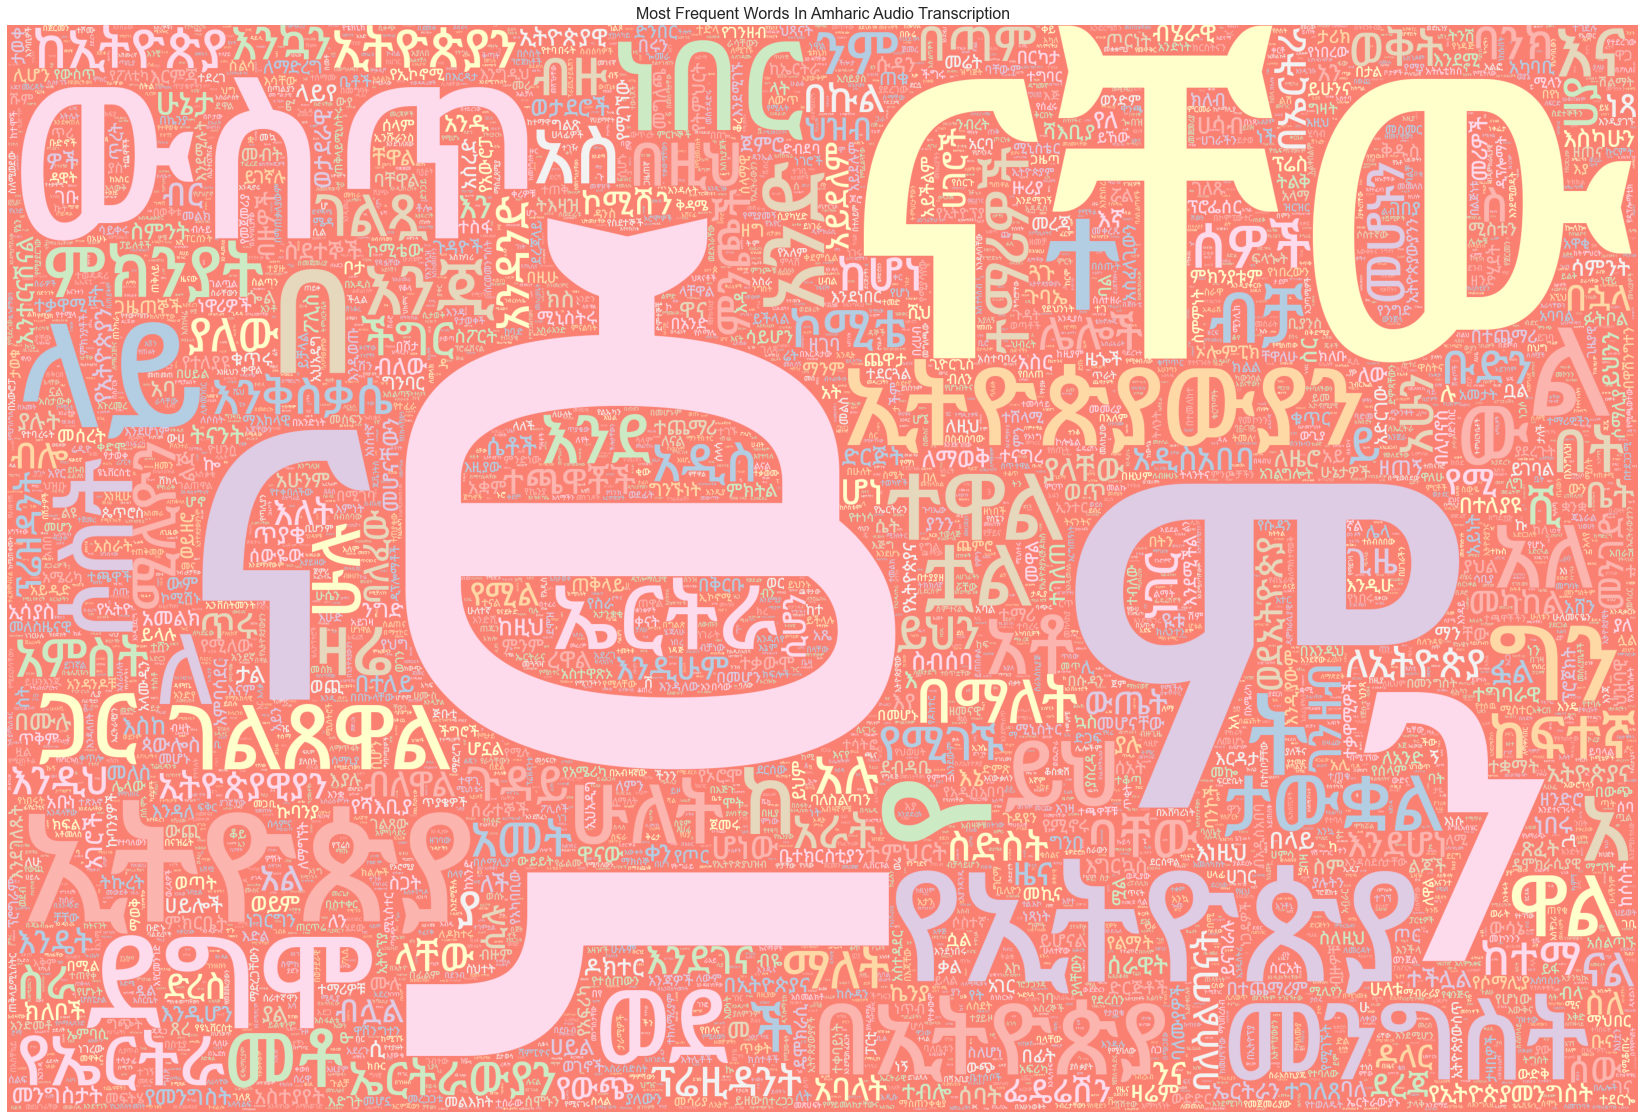

In [57]:
audio_vis.get_wc(data, 'clean_text', [])

In [56]:
data.to_csv('../data/clean_data.csv')

## Save the data in numpy format

Saving the data in numpy format will increase the read spread significantly


In [60]:
allFiles = []
allFiles += [os.path.join(PATH_TEST_WAV, path+".wav") for path in data.key]
allFiles[:10]

['../data/AMHARIC/test/wav/tr_10000_tr097082.wav',
 '../data/AMHARIC/test/wav/tr_10001_tr097083.wav',
 '../data/AMHARIC/test/wav/tr_10002_tr097084.wav',
 '../data/AMHARIC/test/wav/tr_10003_tr097085.wav',
 '../data/AMHARIC/test/wav/tr_10004_tr097086.wav',
 '../data/AMHARIC/test/wav/tr_10005_tr097087.wav',
 '../data/AMHARIC/test/wav/tr_10006_tr097088.wav',
 '../data/AMHARIC/test/wav/tr_10007_tr097089.wav',
 '../data/AMHARIC/test/wav/tr_10008_tr097090.wav',
 '../data/AMHARIC/test/wav/tr_10009_tr097091.wav']